# NLP with PyTorch

## Beobachtung und Zielcodierung

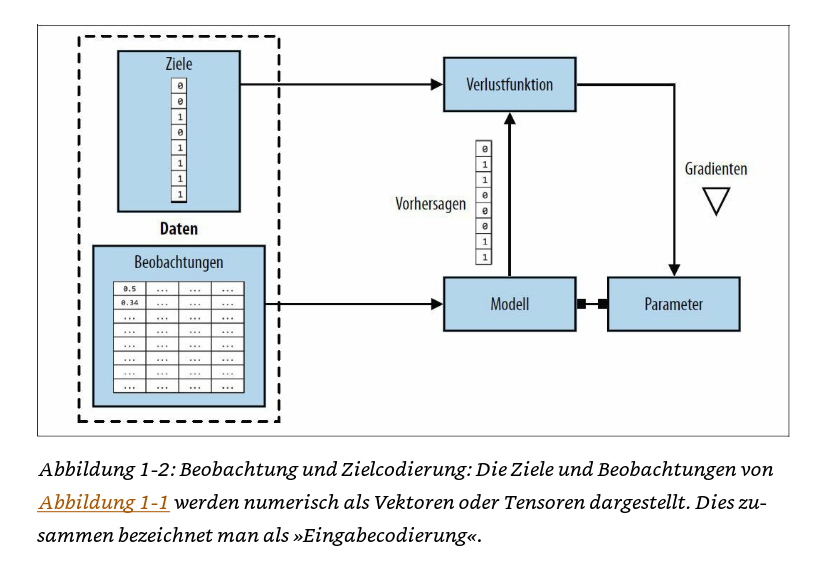

In der NLP Analyse ist eine Darstellung als TF (Term-Frequency) üblich, um die Verteilung der Wörter zu illustrieren. 

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import TfidfVectorizer 

import torch
import numpy as np

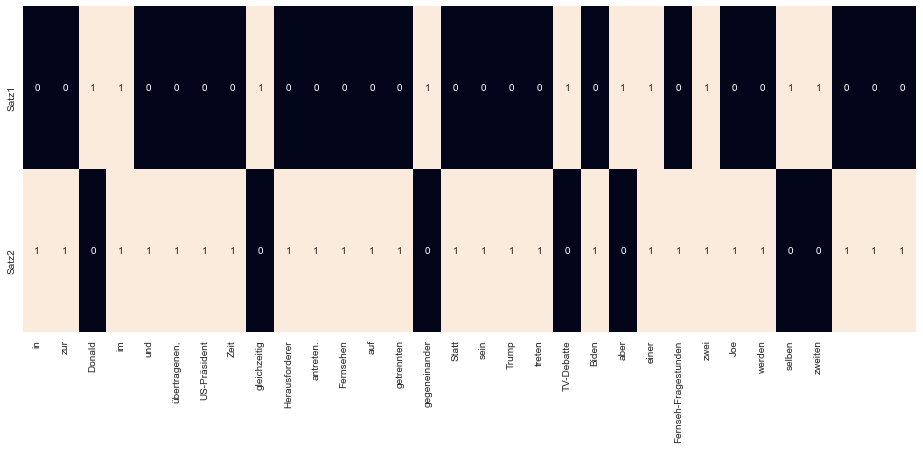

In [21]:

ytick=['Satz1','Satz2']

corpus =['Trump und Biden treten zur selben Zeit im Fernsehen auf',
         'Statt in einer zweiten TV-Debatte werden US-Präsident Donald Trump und sein Herausforderer Joe Biden in zwei gleichzeitig übertragenen, aber getrennten Fernseh-Fragestunden gegeneinander antreten.']
vocab=set(corpus[0].split()+corpus[1].split())
one_hot_vectorizer=CountVectorizer(binary=True)
one_hot=one_hot_vectorizer.fit_transform(corpus).toarray()
plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')
sns.heatmap(one_hot,annot=True,cbar=False,xticklabels=vocab, yticklabels=ytick)
plt.savefig("output.png")

Eine TF-IDF Darstellung gewichtet Wörter proportional zur ihrer Häufigkeit, somit erhalte seltenere Terme ein höheres Gewicht. Häufige Tokens werden bestraft und seltenere belohnt. $$IDF (w)=log N/n_w $$, wobei *n<sub>w</sub>* die Anzhal der Dokumente entspricht, die das Wort *w* enthalten und *N* die Gesamtzahl der Dokumente angibt.

<AxesSubplot:>

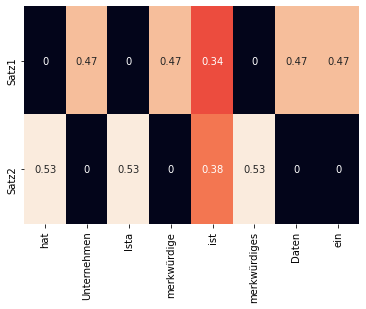

In [18]:
tfidf_vec=TfidfVectorizer()
tfidf=tfidf_vec.fit_transform(corpus).toarray()
sns.heatmap(tfidf,annot=True,cbar=False,xticklabels=vocab, yticklabels=ytick)

Heuristische Maßnahmen werden bei Deep-Learning Verfahren selten angewandt, weil das Ziel im Erlenen der Darstellung liegt. 

## Berechnungsgraphen

Ein Berechnungsgraph ist eine technische Abstraktion, die mathematische Ausdrücke modelliert. Beispielsweise der Termn: 

$$y=wx+b$$

welcher sich in zwei subterme unterteilen lassen kann. 

$$ 1.\space z=wx$$

und 

$$ 2.\space y=z+b$$

Somit kann der ursprüngliche Ausdruck mit einen azyklischen Graphen (DAG -Directed Acyclic Graph) darstellen. Knoten stellen hierbei mathematische Operationen da und Kanten die eingehenden Eingaben.  

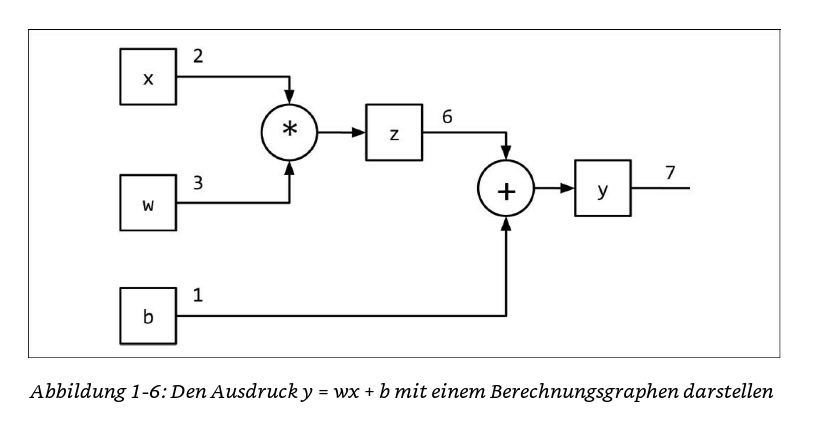

# Pytorch

## Tensoren erstellen

In [12]:
def describe(x):
    print("Type:{}".format(x.type()))
    print("Shape/Size:{}".format(x.shape))
    print("Values:\n{}".format(x))

In [5]:
describe(torch.Tensor(2,3))

Type:torch.FloatTensor
Shape/Size:torch.Size([2, 3])
Values:
tensor([[5.2596e+22, 1.0357e-11, 1.0394e+21],
        [2.1629e+23, 3.3703e-06, 6.3013e-10]])


In [6]:
# zufällig
describe(torch.rand(2,3)),torch.rand(2,3)

Type:torch.FloatTensor
Shape/Size:torch.Size([2, 3])
Values:
tensor([[0.9973, 0.7797, 0.9075],
        [0.1177, 0.9938, 0.6502]])


(None,
 tensor([[0.5474, 0.5819, 0.1799],
         [0.5592, 0.9154, 0.8635]]))

In [7]:
#Normalverteilt
describe(torch.randn(2,3))

Type:torch.FloatTensor
Shape/Size:torch.Size([2, 3])
Values:
tensor([[ 0.9716,  0.8876, -0.1882],
        [ 0.3139,  1.6151,  0.6621]])


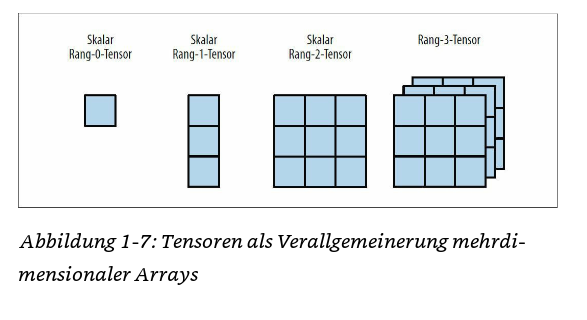

Ein Tensor erster Ordnung entspricht einem Array, ein Tensor zweiter Ordnung entspricht einem Vektor, einer der dritten Ordnung einer Matrik und einer der vierten einem Tensor. Somit entspricht ein Tensor einem *n-dimensionaler* Array von Skalaren.

In [8]:
describe(torch.zeros(2,3))

Type:torch.FloatTensor
Shape/Size:torch.Size([2, 3])
Values:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [12]:
# leeren tensor erstellen
x=torch.zeros(2,3)
# füllen, mit '_' inplace
x.fill_(5)
describe(x)

Type:torch.FloatTensor
Shape/Size:torch.Size([2, 3])
Values:
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [15]:
# Aus Listen Tensoren erzeugen 
l=[1,2,3],[4,5,6]
torch.Tensor(l)

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [18]:
# Aus Numpy-Array's Tensorern erstellen
npy=np.random.rand(2,3)
torch.from_numpy(npy)

tensor([[0.7095, 0.0946, 0.0895],
        [0.1611, 0.9784, 0.9873]], dtype=torch.float64)

## Typ und Größe von Tensoren 

Tensoren lassen sich während einer Initialisierung durch einen spezifischen dtype Parameter im Typus bestimmen bzw. im späteren konvertieren. 

In [22]:
# Float 
x=torch.FloatTensor([2,4])
x

tensor([2., 4.])

In [23]:
# Long
x.long()

tensor([2, 4])

In [26]:
# Int
y=torch.tensor([[1,2,3],[4,5,6]],dtype=torch.int64)
y

tensor([[1, 2, 3],
        [4, 5, 6]])

In [29]:
y=y.float()
y

tensor([[1., 2., 3.],
        [4., 5., 6.]])

## Tensor-Operationen

Mit Tensoren können alle mathematischen Operationen durchgeführt werden. 

In [31]:
# Reihenfolge
x=torch.arange(6)
x

tensor([0, 1, 2, 3, 4, 5])

In [35]:
# Betrachtung und 
x.view(3,2)

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [51]:
y=torch.randn(3,2)
y

tensor([[ 0.3203,  1.5110],
        [ 1.2198,  1.3243],
        [-0.2822,  0.0298]])

In [52]:
# Zeilen
torch.sum(y,dim=1)

tensor([ 1.8312,  2.5442, -0.2524])

In [53]:
# Spalten
torch.sum(y,dim=0)

tensor([1.2579, 2.8651])

In [56]:
a=torch.randn(3,2)
b=torch.randn(3,2)
a,b,torch.add(a,b)

(tensor([[ 0.9617, -1.2092],
         [ 0.2984, -1.8840],
         [-0.3034,  0.8801]]),
 tensor([[ 0.0916,  1.1388],
         [-1.8962, -0.5231],
         [ 1.3067,  0.8134]]),
 tensor([[ 1.0533, -0.0704],
         [-1.5978, -2.4071],
         [ 1.0033,  1.6935]]))

In [65]:
a

tensor([[ 0.9617, -1.2092],
        [ 0.2984, -1.8840],
        [-0.3034,  0.8801]])

In [72]:
torch.transpose(a,0,1)

tensor([[ 0.9617,  0.2984, -0.3034],
        [-1.2092, -1.8840,  0.8801]])

## Indizieren, Slicing und Verknüpfung 

In [72]:
x=torch.arange(6).view(2,3)
# sclicing
x[:5,:2]

tensor([[0, 1],
        [3, 4]])

In [32]:
#sclicing 
x[1,1]

tensor(4)

In [63]:
# Tensor erstellen
# Indizierung mit Tensoren kann nur über LongTensoren erfolgen
indices=torch.LongTensor([0,2])

torch.index_select(x,dim=0,index=indices)

tensor([[0, 1],
        [4, 5]])

In [73]:
row_indices=torch.arange(2).long()
col_indices=torch.LongTensor([0,1])
describe(x[row_indices,col_indices])

Type:torch.LongTensor
Shape/Size:torch.Size([2])
Values:
tensor([0, 4])


In [75]:
x

tensor([[0, 1, 2],
        [3, 4, 5]])

In [76]:
# Concat Tensors
torch.cat([x,x],dim=1)

tensor([[0, 1, 2, 0, 1, 2],
        [3, 4, 5, 3, 4, 5]])

In [77]:
torch.stack([x,x])

tensor([[[0, 1, 2],
         [3, 4, 5]],

        [[0, 1, 2],
         [3, 4, 5]]])

In [89]:
# Addition 
x2=torch.ones(3,2)
x2[:,1]+=1
x2

tensor([[1., 2.],
        [1., 2.],
        [1., 2.]])

In [104]:
# Multiplikation 
mat1=torch.randn(2,3)
mat2=torch.randn(3,2)
mat1,mat2,torch.mm(mat1,mat2)

(tensor([[ 0.7774, -1.0573,  0.3249],
         [ 0.1693,  0.2870, -0.2938]]),
 tensor([[-1.1674, -1.0308],
         [ 0.9609, -1.2688],
         [ 1.5396, -0.6578]]),
 tensor([[-1.4234,  0.3265],
         [-0.3742, -0.3455]]))

$$
\left(\begin{array}{cc} 
0.8944272 & 0.4472136\\
0.5488 & -0.1523435 \\
0.23456 & -0.1267743
\end{array}\right)
\left(\begin{array}{cc} 
10 & 0\\ 
0 & 5 \\
1 & 7
\end{array}\right)
$$ 

## Tensoren und Berechnungsgraphen

Das boolsche Flage, requires_grad aktiviert Buchhaltungsfunktionen, womit der Gradient am Tensor und die Gradientenfunktion verfolgt werden können. Hierbei werden sowohl die Werte des Vorwärtspasses als auch mittels eines einzelen Skalars, die Werte des Rückwärtspasses berechnet. 

Im Allgemeinen ist der Gradient ein Wert, der den Anstieg der Ausgabe einer Funktion bezogen auf die Eingabe der Funktion darstellt. 

In [134]:
x=torch.ones(2,2,requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [135]:
y=(x+2)*(x+5)+3
y

tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)

In [136]:
z=y.mean()
z

tensor(21., grad_fn=<MeanBackward0>)

In [137]:
describe(z)

Type:torch.FloatTensor
Shape/Size:torch.Size([])
Values:
21.0


In [138]:
z.backward()
print(x.grad)

tensor([[2.2500, 2.2500],
        [2.2500, 2.2500]])


## Cuda Tensoren

In [139]:
torch.cuda.is_available()

False

In [141]:
device=torch.device("cuda" if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [142]:
# Auf Graka spielen wenn vorhanden
x=torch.randn(3,3).to(device)

Sofern CUDA als auch Non-CUDA device auf dem gleichen Gerät sind, können beide Form miteinander operieren. Bei größeren Datenmengen ist dies mit Zeit und Kosten verbunden, daher ist es üblich Berechnungen auf der Grafikeinheit durchzuführen und das letzte Ergebnis auf die CPU zu übertragen.  

In [144]:
y = torch.rand(3, 3)
y = y.to(cpu_device) 
x = x.to(cpu_device) 
x + y 

tensor([[-0.3525, -0.2286,  0.9623],
        [ 0.4786, -0.8340,  1.2340],
        [-0.4518,  2.0182,  0.0340]])

# NLP Verfahren

## Allgemeines

Eine **Textdatenmenge** wird als **Korpus** bezeichnet.
**Wörter und Nummern**, die durch leerzeichen oder Satzzeichen **getrennt** sind, werden als **Token** bezeichnet. Metadaten, wie Identifizierer, Beschriftungen und Zeitstempel, werden mit dem Text zusammen als Instanz/Datenpunkt bezeichnet. 

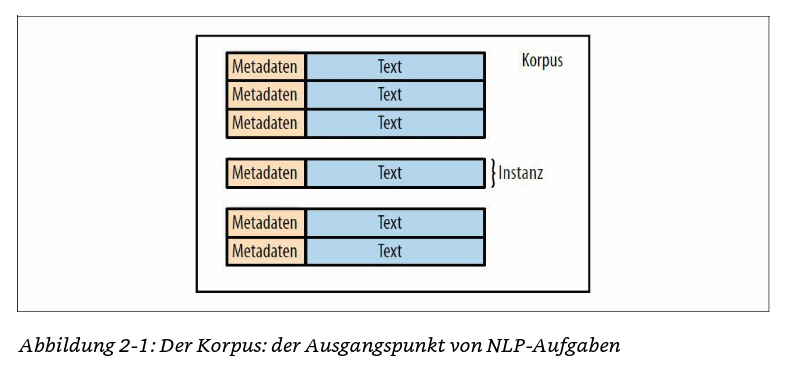

Bei *Typen* handelt es sich um eindeutige Token, die in einem Korpus vorhanden sind. Die Menge aller Typen ist sein *Vokabular* oder *Lexikon*. Eine basale Unterscheidung erfolgt zwischen Inhaltswörtern und Stoppwörter. 


In [9]:
# Beispiel für Tokenisierung 

import spacy
import en_core_web_sm

nlp=en_core_web_sm.load()
text="Mary, don't slap the green witch"
print([str(token) for token in nlp(text.lower())])

ModuleNotFoundError: No module named 'en_core_web_sm'

In [161]:
from nltk.tokenize import TweetTokenizer

In [167]:
tweet="Snow White and the Seven Degrees #MakeAMovieCold@midnight:-)"

tokenizer=TweetTokenizer()
print(tokenizer.tokenize(tweet.lower()))

['snow', 'white', 'and', 'the', 'seven', 'degrees', '#makeamoviecold', '@midnight', ':-)']


## Monogramm, Bigramm, Trigramm, N-Gramm

In [169]:
def n_grams(text,n):
    'N-gram - Creator'
    
    return[text[i:i+n] for i in range(len(text)-n+1)]

In [171]:
cleaned=['marie',',',"'n't",'schlafanzug']

print(n_grams(cleaned,3))

[['marie', ',', "'n't"], [',', "'n't", 'schlafanzug']]


## Lemmas und Stämme

In [179]:
doc=nlp("he was running late")
for t in doc:
    print('{}-->{}'.format(t,t.lemma_))

he-->-PRON-
was-->be
running-->run
late-->late


## Wörter kategorisieren: POS-Tagging

Wörter können über ihren Tyus kategorisiert werden. Dies wird als POS-Tagging bezeichnet

In [174]:
for t in doc:
    print('{}-->{}'.format(t,t.pos_))

he-->PRON
was-->AUX
running-->VERB
late-->ADV


## Phrasen und Eigennamenerkennung

Eine Segmentierung der Texte in zusammenhängende Tokens wird als Phrasenkennung bezeichnet. Dieses *Shallow Parsing* zielt darauf ab, Einheiten einer höhreren Ordnung zu sammeln und zu ermitteln, dazu zählen die Kategorisierung von Verben, Adjektive Nomen stc. 

In [180]:
# NP spezifiziert einene Noun-Phrase
doc=nlp("Mary slapped the green witch")
for c in doc.noun_chunks:
    print('{}-->{}'.format(c,c.label_))

Mary-->NP
the green witch-->NP


Eine andere variante wäre die *Eigenname*-Variante (*Named Entitiy*). Hier werden Entitäten bestimmten Gruppen zugeordnet.
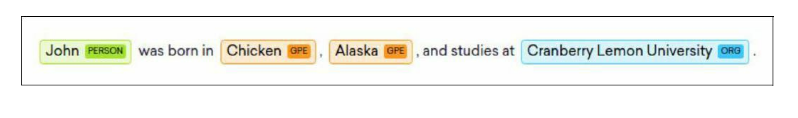

Mit dem *Parsing* wird die Beziehung unterschiedlicher grammatikalischer Satzteile untereinander dargestellt. Etabliert hat sich hierbei die *Dependenzzerlegung*.
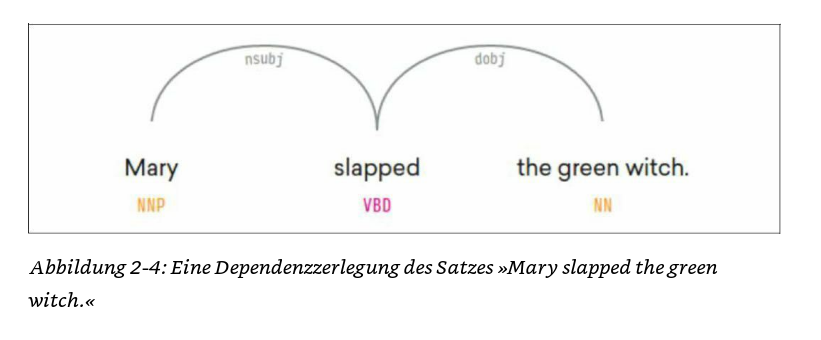

# Grundlegende Komponenten von neuralen Netzen

## Perzeptron

Das Perzeptron ist die einfachste Form eines neuralen Netzes. Jedes Perzeptron besitzt eine Eingabe (x), eine Ausgabe(y) und drei *Regler*: einen Satz an Gewichten *w*, ein Bias *b* und eine Aktivierungsfunktion *f*. 

Die Gewichte und das Bias werden aus den Daten gelernt, die Aktivierungsfunktion wird manuell gewählt. Mathematisch drückt sich dies wie folgt aus: 

$$y=f(wx+b)$$

Mehrere Eingaben führen in der Regel zum Perzeptron, dies erfolgt als Vektor: *x* und *w* sind Produkte des Punktprodukts beider. 

In [10]:
import torch
import torch.nn as nn
import numpy as np

In [3]:
class Perceptron(nn.Module):
    '''
    Ein Perzeptron als lineare Schicht
    '''
    
    def __init__(self,input_dim):
        '''
        Args:
        input_dim(int): Größe der Eingabefeatures
        '''
        super(Perceptron, self).__init__()
        self.fc1=nn.Linear(input_dim,1)
        
    def forward(self,x_in):
        '''
        Der Forward-Pass des Perzeptrons
            
            Args: 
            x_in (torch.Tensor): ein Eingabe-Datentensor
            x_in.shaoe sollte (batch,num_features) sein
            
            Return:
                der resultierende Tensor.tensor.shape sollte (batch,) sein. 
        '''
        return torch.sigmoid(self.fc1(x_in)).squeeze()

Mit der Klasse *linear* erfolgen die anfallenden Anpassungen für die Gewichte und Bias, sowie die Durchführung der affanin Transformation.  

## Aktivierungsfunktionen 

Eine Aktivierungsfunktion ist eine Nichtlinearität, die in ein neurales Netz eingeführt wird, um komplexe Beziehung in den Daten zu erfassen.

### Sigmoid 

Die Sigmoid Funktion ist eine der Aktivierungsfunktion, die eine Realzahl in den Bereich zwischen 0 und 1 transformiert.

$$f(x)=\frac{1}{1+e^{-x}}$$

Wie unten zu sehen ist, produziert die Sigmoid-Funktion Ausgaben in der Nähe der Extremwerte. Sie führt deshalb dazu, dass die Gradienten entweder zu Null tendieren oder einem überlaufenden Gleitkommawert (also unendlich) anstreben (Die Spannweite entspricht somit von -unendlich bis + unendlich). Dies wird als *Problem des schwindenden Gradienten* bezeichnet. Demnach wird die Sigmoid Funktion i.d.R nur verwendet, wenn die Ausgabe es erhalbt Wahrscheinlichkeiten zu interpretieren.  

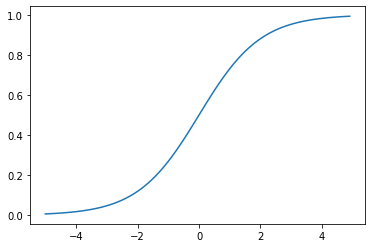

In [15]:
# Eine Implementation in Torch erfolgt über 

import matplotlib.pyplot as plt 

x=torch.arange(-5,5,0.1)
y=torch.sigmoid(x)
plt.plot(x.numpy(),y.numpy())
plt.show();

### Tanh

Die Tanh-Funktion ist eine einfache lineare Ableitung der Sigmoid Funktion. Sie ist ebenfalls *quetschend*, bildet allerdings reale Werte aus dem Bereich $-\infty,+\infty$ in den Bereich $[-1,+1]$ ab.

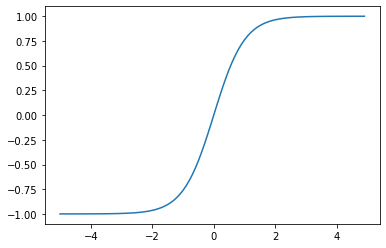

In [11]:
y=torch.tanh(x)
plt.plot(x.numpy(),y.numpy())
plt.show();

### ReLU

Eine *Rectified Linear Unit* beschreibt eine gleichgerichtete lineare Einheit. Sie gilt als die wichtigste Aktivierungsfunktion.
Eine ReLU-Einheit schneidet negative Werte auf Null ab. 

$$f(x)=max(0,x)$$ 


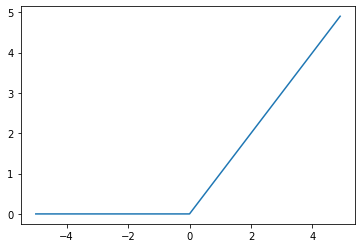

In [12]:
relu=torch.nn.ReLU()
y=relu(x)
plt.plot(x.numpy(),y.numpy())
plt.show();

Der Begrenzungseffekt der ReLU-Funktion, welcher beim Problem der verschwindenden Gradienten hilft, kann ebenfalls zum Problem werden, wobei mit der Zeit bestimmte Ausgaben des Netzes zu Null werden und niemals wieder einen anderen Wert annehmen. Dies wird als *sterbendes ReLU* Problem bezeichnet. Aus diesem Grund gibt es Varianten der ReLU-Funktion: **Leaky ReLU** und **Parametric ReLU**.

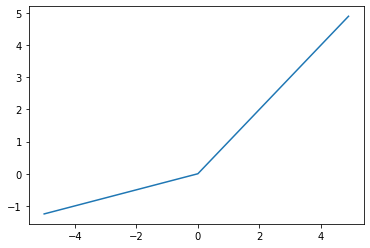

In [29]:
# Prelu
x=torch.arange(-5,5,0.1)
prelu=torch.nn.PReLU(num_parameters=1) 
y=prelu(x)
plt.plot(x.detach().numpy(),y.detach().numpy())
plt.show();

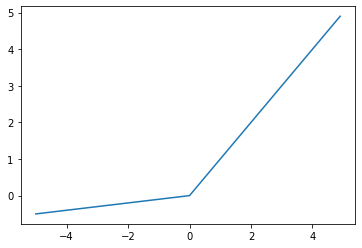

In [22]:
# LeakyRelu mit Slope-Konfiguration
prelu=torch.nn.LeakyReLU(0.1) 
y=prelu(x)
plt.plot(x.detach().numpy(),y.detach().numpy())
plt.show();

### Softmax

Ähnlich zur Sigmoid Funktion, quetscht die Softmax-Funktion alle Werte in den Bereich zwischen 0 und 1. 
Allerdings dividiert die Softmax-Funktion jede Ausgabe durch die Summe aller Ausgaben, wodurch eine Wahrscheinlichkeitsverteilung über *k* mögliche Klassen geliefert wird.

$$ softmax(x_i)= \frac{e^{x_i}}{\sum\limits_{j=i}^{k} e^{x_j}} $$

Die Wahrscheinlichkeiten in den resultierenden Verteilungen summieren sich zu 1. Dies ist sehr nützlich, um die Ausgaben für Klassifizierungsaufgaben zu interpretieren. Die Softmax-Funktion entspricht in der Physik einer Boltzmann- oder Gibss-Verteilung, in der Statistik entspricht sie einer multinomialen logistischen Regression und im NLP/ Computerlingustik ist die Rede vom Klassifizierer für maximale Entropie (MaxEnt). 

In [34]:
softmax=nn.Softmax(dim=1)
x_input=torch.randn(1,3)
y_output=softmax(x_input)
print(x_input)
print(y_output)
print(torch.sum(y_output,dim=1))

tensor([[-0.5533, -1.4383,  1.1509]])
tensor([[0.1447, 0.0597, 0.7956]])
tensor([1.])


## Verlustfunktion 

Eine Verlustfunktion übernimmt einen Wahrheitswert *y* und einen Vorhersagewert $\hat y$ und liefert einen reellwertigen Score. Je höher der Score, desto schlechter das Modell. 

### MSE 

Die mittlere quadratische Abweichung berechnet sich aus den Quadraten der Differenzen zwischen vorhergesagten Werten und den Zielwerten. 

$$ L_{MSE}(y,\hat y)=\frac{1}{n}\sum\limits_{i=1}^{n}(y-\hat y)^2 $$

In [40]:
mse_loss=nn.MSELoss()
outputs=torch.randn(3,5, requires_grad=True)
targets=torch.randn(3,5)
loss=mse_loss(outputs,targets)
print(loss)

tensor(3.0432, grad_fn=<MseLossBackward>)


### Kategorischer Kreuzentropie-Verlust 

Diese Verlustfunktion wird bei mehrklassiger Klassifikation angewandt, wobei die Ausgaben als Vorhersagen von Klassenzugehörigkeitswahrscheinlichkeiten interpretiert werden. 

Dieses Verfahren vergleicht zwei Vektoren miteinander, den Zielvektor *y* und den Ausgabevektor *$\hat y$* und misst dadurch den Verlust. 

$$L_{cross-entropy(y,\hat y)=-\sum\limits_{i}y_ilog(\hat y_i)}$$

Die Wahrscheinlichkeit der korrekten Klassen soll nahe bei 1 liegen, während die anderen Klassen Wahrscheinlichkeiten bei nahe 0 liegen sollten.

Somit wird die Differenz gemessen, zwischen zwei Wahrscheinlichkeitsverteilungen: der vom NN ausgegebenen und der tatsächlichen Verteilungen. 

In [46]:
ce_loss=nn.CrossEntropyLoss()
outputs=torch.randn(3,5, requires_grad=True)
targets=torch.tensor([1,0,3],dtype=torch.int64)
loss=ce_loss(outputs,targets)
print(loss)

tensor(2.1473, grad_fn=<NllLossBackward>)


### Binäre Kreuzentropie

Bei der binären Version liegen zwei Klassen vor.

In [64]:
bce_loss = nn.BCELoss() 
sigmoid = nn.Sigmoid() 
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True)) 
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1) 
loss = bce_loss(probabilities, targets) 
print(probabilities) 
print(loss)

tensor([[0.7179],
        [0.2217],
        [0.7416],
        [0.7362]], grad_fn=<SigmoidBackward>)
tensor(0.5534, grad_fn=<BinaryCrossEntropyBackward>)


## Supervised Learning

### Synthetische Daten erzeugen

In [4]:
LEFT_CENTER = (3, 3)
RIGHT_CENTER = (3, -2)


def get_toy_data(batch_size, left_center=LEFT_CENTER, right_center=RIGHT_CENTER):
    x_data = []
    y_targets = np.zeros(batch_size)
    for batch_i in range(batch_size):
        if np.random.random() > 0.5:
            x_data.append(np.random.normal(loc=left_center))
        else:
            x_data.append(np.random.normal(loc=right_center))
            y_targets[batch_i] = 1
    return torch.tensor(x_data, dtype=torch.float32), torch.tensor(y_targets, dtype=torch.float32)

In [5]:
test=get_toy_data(100)
test

(tensor([[ 2.3234, -1.0102],
         [ 2.1469, -1.2622],
         [ 4.1957, -2.6557],
         [ 2.2756, -2.7141],
         [ 4.7374, -1.9180],
         [ 0.5523, -3.5085],
         [ 2.5004,  0.4373],
         [ 2.9996,  2.2996],
         [ 3.7779,  2.9978],
         [ 3.9898,  2.0042],
         [ 3.0659,  2.6487],
         [ 1.1164,  4.7416],
         [ 2.3394,  3.8600],
         [ 2.9323,  3.3491],
         [ 4.8302, -3.2863],
         [ 1.3552,  4.0244],
         [ 2.8545, -2.4720],
         [ 2.6592, -1.5920],
         [ 2.8285, -0.6010],
         [ 2.2632,  1.9995],
         [ 2.6879, -2.1639],
         [ 2.2374,  2.9379],
         [ 3.3909, -2.3135],
         [ 2.8500,  2.7071],
         [ 4.8351,  1.1673],
         [ 0.4743,  2.3470],
         [ 2.1318, -1.4554],
         [ 2.5532,  2.9641],
         [ 2.1158,  3.2178],
         [ 4.0197, -3.5809],
         [ 1.0234, -2.0922],
         [ 3.3599, -1.9737],
         [ 2.5603,  4.3333],
         [ 2.7224, -2.4633],
         [ 3.1

### Modell auswählen

Auswahl des Models entsprechend der analytischen Aufgabe und der Ausgabeoptionen. Im vorliegenden Fall, beträgt die Eingabegröße 2 Dimensionen (0 vs.1). Mittels einer *Sigmoid* Funktion werden die Wahrscheinlichkeiten, dass X zur Klasse 1 gehört berechnet. Das heißt $P(Y=1|X)$. 


### Wahrscheinlichkeiten in diskrete Klassen konvertieren.

Bei binären Klassifikationen, kann die Entscheidungsgrenze für den Ereigniseintritt $\delta$ bestimmt werden. In der Regel, ergibt sich ein Wert von $\delta=0.5$, sodass $P(y=1|x)>\delta, 1,0$.

### Auswahl der Verlustfunktion

Die Verlustfunktion (Messung des Fehlers zwischen Vorhersagen und Zielen) wird durch das Ergebnis bestimmt. Bei metrischen Werten, Abstandsmetriken und bei Wahrscheinlichkeiten Funktionen aus der Familie der Kreuzentropie. 

### Auswahl des Optimierers 

Ein Optimierer oder auch Lernrate, aktualisiert die Gewichte des Modells anhand eines Fehlerterms. 

In [10]:
import torch.nn as nn
import torch.optim as optim 
input_dim=2
lr=0.001
perceptron=Perceptron(input_dim=input_dim)
bce_loss=nn.BCELoss()
opt=optim.Adam(params=perceptron.parameters(),lr=lr)

### Gradientenbasiertes überwachtes Lernen

Beim Lernen wird zunächst der Verlust berechnet, das heißt wie weit die Modellvorhersagen vom Ziel entfernt sind. Somit wird der Gradient der Verlustfunktion zum Signal, welches besagt um wie viel sich der Parameter ändern sollte.

In [ ]:
# Exemplarischer Durchlauf 

# Jede Epoche ist ein vollständiger Durchlauf über die Trainingsdaten
for e in range(n_epochs):
    # Die innere Schleife ist eine Iteration über die Batches 
    for b in range(n_batches):
        # Schritt 0: Daten holen 
        x,y=get_toy_data(b)
        
        # Schritt 1: Gradienten reseten 
        perceptron.zero_grad()
        
        # Schritt 2: Den Forward-Pass berechnen 
        y_pred=perceptron(x,apply_sigmoid=True)
        
        # Schritt 3: Den Verlustwert berechnen, den wir optimieren wollen 
        loss= bce_loss(y_pred,y)
        
        # Schritt 4: Das Verlustsignal rückwärts weiterleiten 
        loss.backward()
        
        # Schritt 5: Den Optimierer anstoßen, um eine Aktualisierung durchzuführen 
        optimizer.step()     

### Kreuzvalidierung zur Datenaufteilung

Der gesamte Datensatz wird in k-fache gleich große Einheiten, den *Folds* aufgeteilt. Ein *Fold* ist der Bewertung reserviert (Testdaten),
und die verbleibenden $k_{-1}$ *Folds* dem Training. Dies ist ein iteratives Vorgehen, wobei der *Bewertungsfold* immer 
ausgetauscht wird. Somit entspricht die letzte vermittelte *k*-Genauigkeit einem $\mu (k)\substack{+\\-}\sigma$. Korrigiert den Optimismus und den Pessimismus bei zu kleinen Datensätzen. 

### Early Stopping

Eine etablierte Methode der Trainingsbeendung, ist das *Early Stopping*. 
Das *Early Stopping* ist eine Heuristik, welche auf die Performanz (der Genauigkeit) des Validierungsdatensatzes aufbaut.
Diese wird von Epoche zu Epoche verfolgt und sobald keine nennenswerte Änderung über *n* Epochen (*Geduld*) auftritt, endet das Training. Dies entspricht einer Konvergenz.

### Regularisierung

Regularisierungsverfahren stammen aus der Theorie der numerischen Optimierung. 
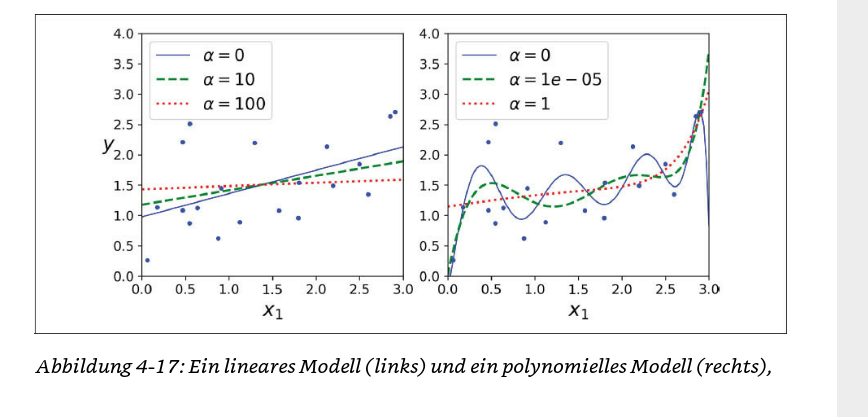

Das oben angeführte Schaubild verdeutlicht, dass beide Kurven theorethisch zu den Punkten passen; nach Ockhamschen Kriterien, ist eine einfache Erklärung besser als eine komplizierte. Eine Regularisierung entspricht daher eines Fehlerterms zur Verhinderung steigender Komplexität. Hierbei gibt es zwei populäre Varianten: die *L1-Regularisierung* (Lasso) oder die *L2-Regularisierung* (Ridge). 

Bei der L1-Regularisierung gilt:
$$J(\theta) =MSE(\theta)+\alpha\sum^n_{i=1}|\theta_i|$$

Bei einer L1-Variante, werden die Gewichte der unwichtigsten Merkmale vollständing eliminiert. 
Somit führt die Lasso (L1) Variante ein spärliches Modell aus, in dem eine automatische Merkmalsauswahl stattfindet. Der Bias Term $\theta$ ist hierbei regularisiert. 

Bei einer L2-Regularisierung wird $\alpha$ anders gehandhabt: 
$$J(\theta) =MSE(\theta)+\alpha\frac{1}{2}\sum^n_{i=1}\theta_i^2$$

Bei einem $\alpha=0$ entspricht die L2 somit einer linearen Regression; im umgekehrten wiederrum (einem großen $\alpha$) werden Gewichte näher zur Null und es gibt eine horizontale Linie durch den Mittelwert der Daten. Der Bias-Term Theta ist in dieser Version nicht regularisiert;




### Dropout 

Bei einem Dropout-Layer handelt es sich um eine zufällige Abschaltung zweier neuronaler Verbindung im Lernprozess (*wichtig nicht bei Auswertung anwenden*) zur Reduktion von Überanpassungen. Die Grundidee dahinter ist die Abschaltung von "Co-Adaptionen", also einer gruppalen Mustererkennung, um die Interaktionen der Neuronen zu harmonisieren. 

# Feedforward Netze für NLP

## Das MLP

### Kurze erläuterung

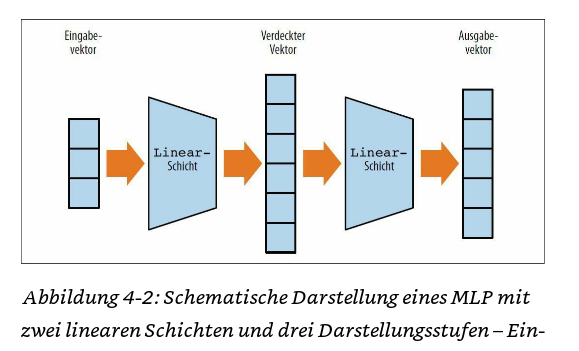

Die Zwischenschicht ermöglicht das Erlernen einer zusätzlichen Trennung auf der Hyperebene, die vor allem bei nicht linear trennbaren Verteilung sinnvoll ist. 


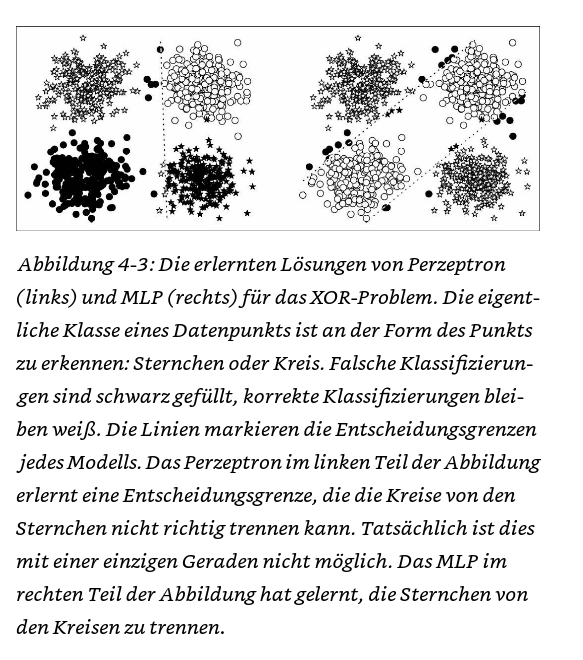

Ein MLP besteht aus gestapelten Linear-Schichten, welche Tensoren auf andere Tensoren abbilden. Nichtlinearität zwischen den linearen Schichten, brechen die lineare Beziehung auf und erlauben es, dass das Modell den umliegenden Vektorraum krümmt. Bei einer Klassifizierung sollte diese Krümmung zu einer linearen Separierbarkeit zwischen Klassen führen.   

### Implementation

In [8]:
import torch.nn as nn 
import torch.nn.functional as F

In [33]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        """
        Args:
            input_dim (int): the size of the input vectors
            hidden_dim (int): the output size of the first Linear layer
            output_dim (int): the output size of the second Linear layer
        """
        super(MultilayerPerceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x_in, apply_softmax=False):
        """The forward pass of the MLP
        
        Args:
            x_in (torch.Tensor): an input data tensor. 
                x_in.shape should be (batch, input_dim)
            apply_softmax (bool): a flag for the softmax activation
                should be false if used with the Cross Entropy losses
        Returns:
            the resulting tensor. tensor.shape should be (batch, output_dim)
        """
        intermediate = F.relu(self.fc1(x_in))
        output = self.fc2(intermediate)
        
        if apply_softmax:
            output = F.softmax(output, dim=1)
        return output

In [31]:
batch_size=2
input_dim=3
hidden_dim=100
output_dim=4

In [32]:
mlp=MultilayerPerceptron(input_dim, hidden_dim, output_dim=output_dim)
print(mlp)

MultilayerPerceptron(
  (fc1): Linear(in_features=3, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=4, bias=True)
)


 ## Das CNN 

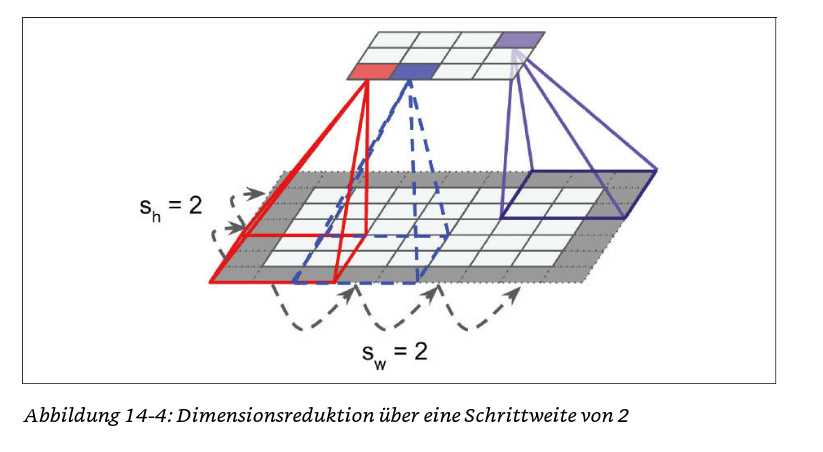

CNN eignen sich sehr gut, um eine räumliche substruktur zu erkennen. Dies verläuft über Faltungsoperationen: Ein Kernel wir auf eine Eingabematrix angewandt und reduziert die Information auf ein *Feature Map* 



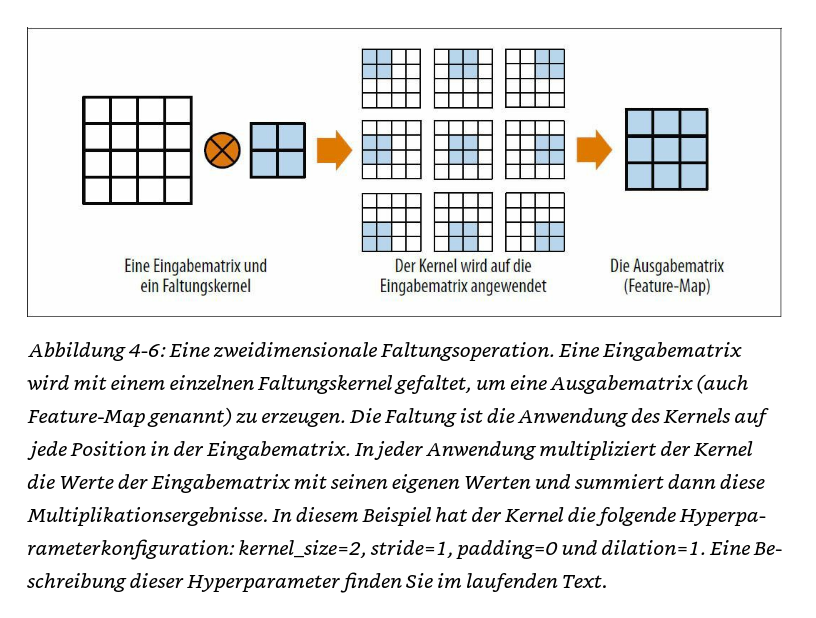

Es existieren mehrere Faltungsoptionen: 1-dimensional, 2-dimensional und 3-dimensional. 
Ein Conv1d ist dann sinnvoll, wenn jedem Zeitschritt ein Merkmalsvektor zugeordnet werden kann; also bei Zeitreihen. <br>
Ein Conv2d erfasst räumlich-zeitliche Muster in zwei Richtungen. Beispielhaft können hier Bilder erwähnt werden, welche anhand der Höhen- und Breitendimension erfasst werden. <br>
Bei Conv3d, also drei Dimensionen, werden zum Beispiel bei Videodaten verwendet. Hier gibt es neben der Höhe und der Breite jedes Frames auch die zeitliche Komposition jedes Frames. 

### Kanäle

Kanäle beziehen sich auf die Feature Dimension jedes Punktes in der Eingabe. 
Ein Bild enthält i.d.R die Komponenten RGB. Bei Textdaten entspricht die Anzahl der Kanäle,
die Größe des Vokabulars. 
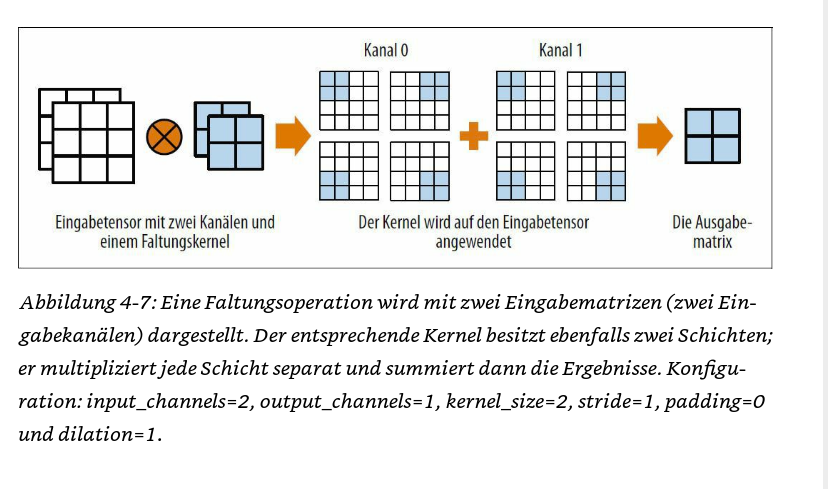

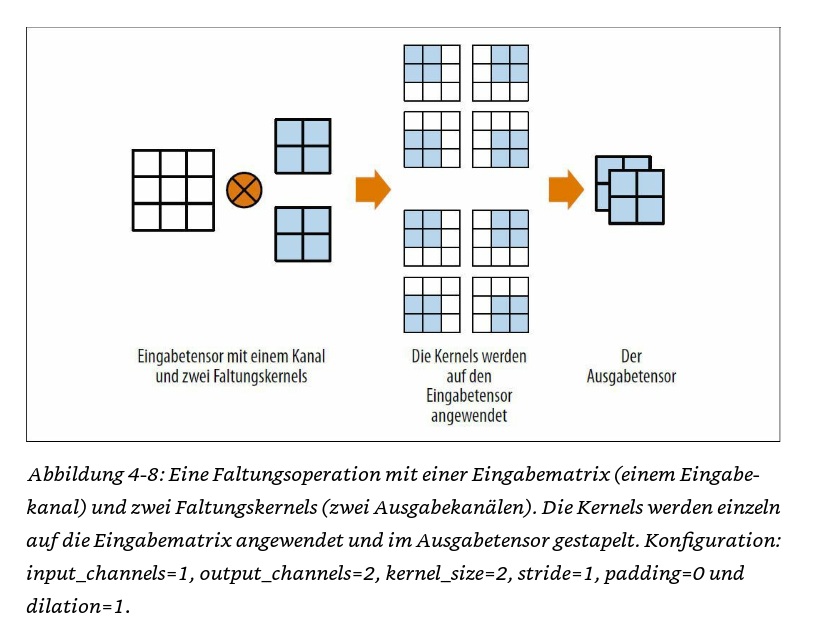

### Kernelgröße 

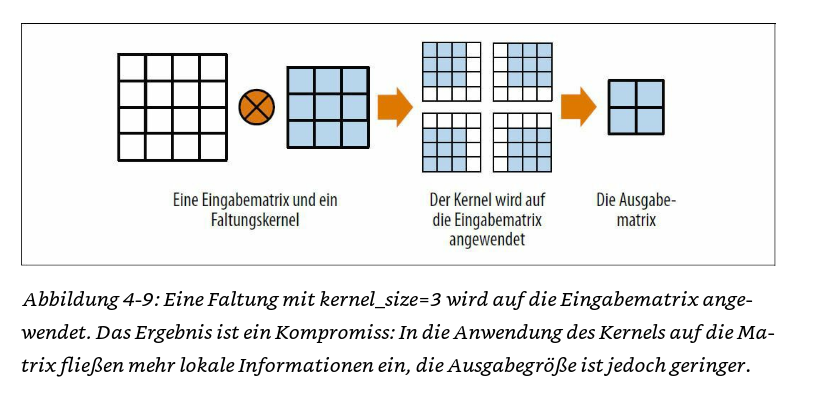

Faltungsoperationen fassen lokale Informationen räumlich oder zeitlich zusammen, wobei der Umfang der lokalen Informationen pro Faltung durch die Kernelgröße gesteuert wird. <br>

Der Einfluss der Kernelgröße in NLP entspricht der eines N-Grams, indem Gruppen von Wörtern betrachtet werden. Bei kleiner Größe entspricht dies der Erfassung kleinerer häufiger vorkommender Muster und bei größeren Kernels, großen Muster, die weniger häufig auftreten. 


### Schrittweite

Mit *stride* wird die Schrittweite zwischen den Faltungen bestimmt. Entspricht die Schrittweite die Größe des Kernles, dann überlappen sich die Kernelberechnungen nicht. Ist sie identisch, dann exisiterit eine maximale Überlappung.

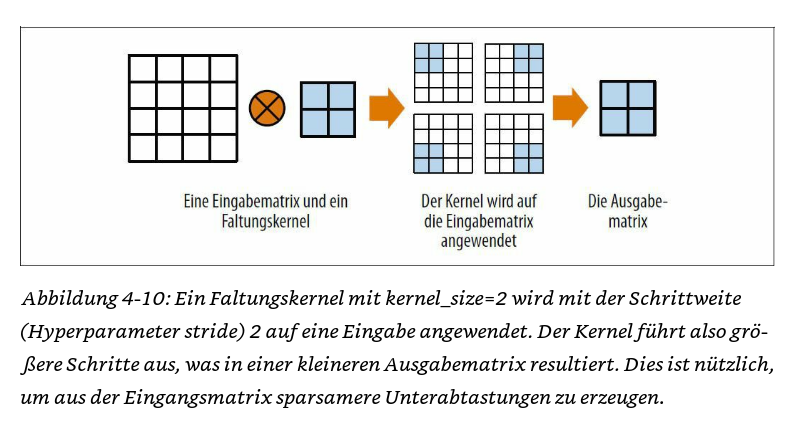


### Padding

Die Kernel-size als auch die Schrittweite, haben einen unbeabsichtigten Nebeneffekt: sie verringern die Gesamtgröße der Featuremap. Dem kann man entgegenwirken, indem der Tensor für die Eingabedaten künstlich vergrößert wird. Dies erfolgt je nach Dimensionalität über die Ergänzung von Nullen: in der Länge bei 1-,2- oder 3-D, in der Höhe bei 2- oder 3-D und in der Tiefe bei 3-D. 
Somit können mehrere Faltungen durchgeführt werden, sodass kein Informationsverlust eintritt. 

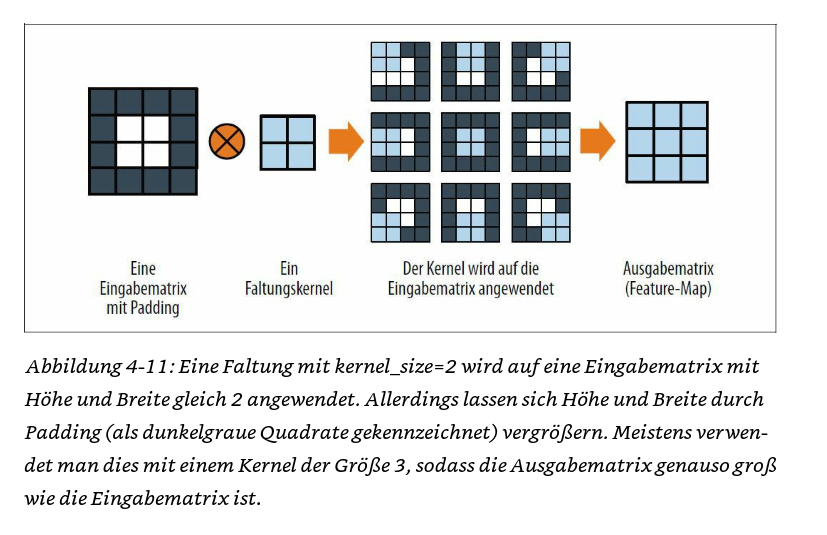

### Dilation

Mit der *Streckung* wird gesteuert, wie der Kernel auf die Eingabematrix angewandt wird. Hierbei bestimmt man, ob der Kernel als gesamtes Objekt oder als freifläche genutzt wird. Dies ist Vorteilhaft, wenn ein größere Bereich des Eingaberaums erfasst werden soll ohne die Anzahl der Parameter zu erhöhen.  

Erweist sich als sehr nützlich, wenn gefaltete Schichten gestapelt werden, denn aufeinanderfolgende gestreckte Faltungen erhöhen exponentiell die Größe des rezeptiven Felds. 

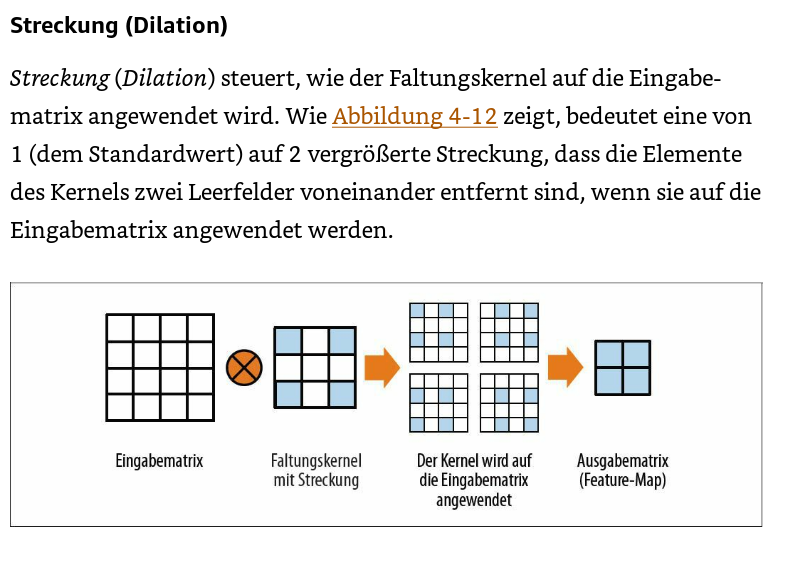


### Implementation

In [1]:
import torch 

batch_size=2
one_hot_size=10
sequence_width=7

data=torch.randn(batch_size,one_hot_size,sequence_width)
data

tensor([[[ 0.8615, -0.7559,  0.7715, -1.4357, -0.1866,  0.5724,  0.9320],
         [-0.4683, -0.6239,  0.0785,  0.7285, -0.3146, -0.9507, -0.6817],
         [-0.1254, -0.9669,  1.3493, -1.1606, -0.3715, -0.7771, -1.8555],
         [ 0.2971,  1.3080, -1.0610,  1.1557,  0.4711,  1.0402,  1.0493],
         [-1.7521, -0.7727,  0.9754, -0.1391, -0.3599,  0.0509,  0.6250],
         [ 0.5208,  1.3850, -0.4182,  0.1863,  0.9352, -0.8975,  2.3664],
         [-0.8419, -0.3604,  0.3313, -0.6871, -0.9131, -1.0592, -0.2458],
         [ 0.3469, -0.1244, -1.0435, -0.0325, -0.5336,  1.9934,  0.9152],
         [-1.4713,  1.0826,  0.4028,  0.2016, -1.2101,  1.4505,  1.0380],
         [ 0.0639,  1.0560,  1.1572, -0.9805,  0.0166,  0.7437,  0.5919]],

        [[-1.0821,  0.6298, -0.1634, -0.1083,  1.2159,  0.0397, -0.2423],
         [ 0.4876,  0.2460,  1.0986,  0.7673,  1.0945,  0.2815,  1.5907],
         [-0.4144,  0.5261,  0.6980, -1.1531, -1.3562,  0.1496, -0.1930],
         [ 0.8088,  0.4530, -0.9517,

In [2]:
from torch.nn import Conv1d

conv1=Conv1d(in_channels=one_hot_size,out_channels=16,kernel_size=3)
intermediate1=conv1(data)
print(data.size())
print(intermediate1.size())

torch.Size([2, 10, 7])
torch.Size([2, 16, 5])


In [4]:
conv2=Conv1d(in_channels=16, out_channels=32,kernel_size=3)
conv3=Conv1d(in_channels=32,out_channels=64,kernel_size=3)

intermediate2=conv2(intermediate1)
intermediate3=conv3(intermediate2)

print(intermediate2.size())
print(intermediate3.size())

torch.Size([2, 32, 3])
torch.Size([2, 64, 1])


Es gibt drei Methoden, um den Ausgabetensor weiter zu reduzieren. 

In [8]:
y_output=intermediate3.squeeze()
y_output.size()

torch.Size([2, 64])

Mit jeder weiteren Ebene wird die Größe der Kanaldimension erhöht, weil diese als Featurevektor für jeden Datenpunkt vorgesehen ist.

In [6]:
print(intermediate1.view(batch_size,-1).size())

torch.Size([2, 80])
